In [ ]:
# PART 3: Step 3: ML Model Training and Evaluation

## Install dependencies
!pip install scikit-learn matplotlib

In [1]:
## Load prepared data
import pickle

with open("X_train.pkl", "rb") as f: X_train = pickle.load(f)
with open("X_test.pkl", "rb") as f: X_test = pickle.load(f)
with open("y_train.pkl", "rb") as f: y_train = pickle.load(f)
with open("y_test.pkl", "rb") as f: y_test = pickle.load(f)

In [2]:
# Train & Evaluate Multiple Models (RF, SVM, XGBoost, Logistic Regression)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Dictionary of models
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200, class_weight='balanced', random_state=42
    ),
    "SVM": SVC(
        probability=True, kernel='rbf', class_weight='balanced', random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=1000, class_weight='balanced', random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss', scale_pos_weight=None, random_state=42
    )
}


In [4]:
results = {}


 Training Random Forest...
 Random Forest Accuracy: 0.7550
 Random Forest AUC: 0.8251
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       203
           1       0.75      0.75      0.75       197

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.76      0.75       400



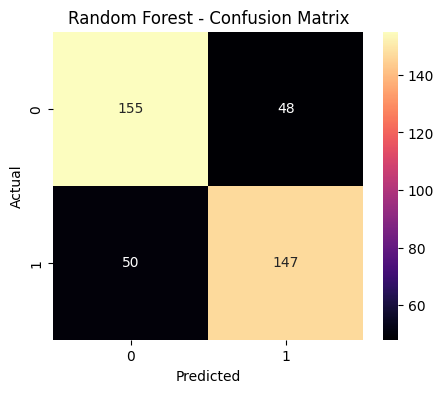


 Training SVM...
 SVM Accuracy: 0.7600
 SVM AUC: 0.8389
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       203
           1       0.76      0.76      0.76       197

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



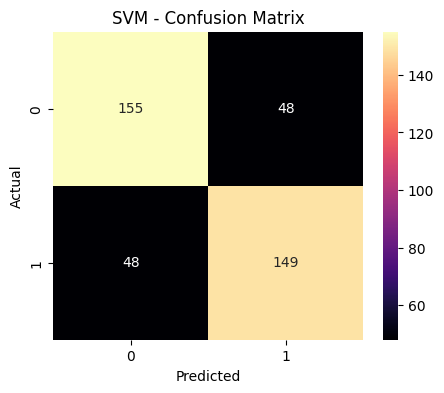


 Training Logistic Regression...
 Logistic Regression Accuracy: 0.7200
 Logistic Regression AUC: 0.7695
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       203
           1       0.71      0.72      0.72       197

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



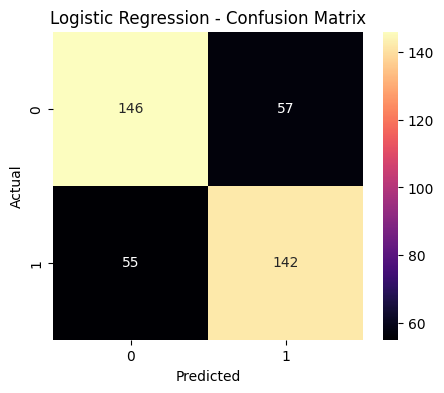


 Training XGBoost...
 XGBoost Accuracy: 0.7700
 XGBoost AUC: 0.8159
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       203
           1       0.75      0.81      0.78       197

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



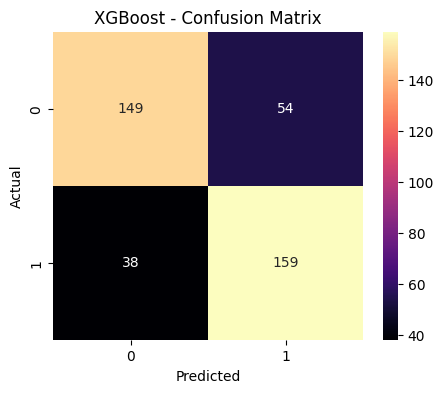

In [5]:
# Loop over models
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {"Accuracy": acc, "AUC": auc, "Report": report, "CM": cm}

    # Print results
    print(f" {name} Accuracy: {acc:.4f}")
    print(f" {name} AUC: {auc:.4f}")
    print(report)

    # Confusion Matrix Heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="magma", cbar=True)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [6]:
# Summary of Accuracy & AUC

print("\n Summary of Model Performance:")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['Accuracy']:.4f}, AUC={metrics['AUC']:.4f}")


 Summary of Model Performance:
Random Forest: Accuracy=0.7550, AUC=0.8251
SVM: Accuracy=0.7600, AUC=0.8389
Logistic Regression: Accuracy=0.7200, AUC=0.7695
XGBoost: Accuracy=0.7700, AUC=0.8159


In [7]:
## Since XGB is selected as BEST MODEL and saved this trained model

model = XGBClassifier(
    eval_metric='logloss', scale_pos_weight=None, random_state=42
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [9]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77
AUC Score: 0.8158835738041059
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       203
           1       0.75      0.81      0.78       197

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [12]:
## roc curve
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go

In [13]:
roc_data = {}

for name, model in models.items():
    # Predict probabilities for positive class (Active = 1)
    y_proba = model.predict_proba(X_test)[:, 1]

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    roc_data[name] = {
        "fpr": fpr,
        "tpr": tpr,
        "auc": roc_auc
    }

In [14]:
fig = go.Figure()

# Add ROC curve for each model
for name, data in roc_data.items():
    fig.add_trace(go.Scatter(
        x=data["fpr"],
        y=data["tpr"],
        mode="lines",
        name=f"{name} (AUC = {data['auc']:.3f})"
    ))

# Add diagonal (random classifier)
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode="lines",
    line=dict(dash="dash"),
    name="Random Classifier"
))

# Layout settings
fig.update_layout(
    title="ROC Curve Comparison for All Models<br><sup>1 = Active compounds, 0 = Inactive compounds</sup>",
    xaxis_title="False Positive Rate (Inactive predicted as Active)",
    yaxis_title="True Positive Rate (Correctly predicted Active)",
    width=800,
    height=600,
    legend=dict(x=0.6, y=0.05),
    template="plotly_white"
)

fig.show()

In [ ]:
# Save your trained model

import joblib
joblib.dump(model, "xgb_model.pkl")
print(" Model saved as xgb_model.pkl")

 Model saved as xgb_model.pkl
